In [38]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documentos\GitHub\ToolBox\data\california_cities.csv")

In [39]:
df.columns
df.dropna(axis=1 , inplace= True)
df.head()

,Unnamed: 0,city,latd,longd,population_total,area_land_sq_mi
0,0,Adelanto,34.576111,-117.432778,31765,56.009
1,1,AgouraHills,34.153333,-118.761667,20330,7.793
2,2,Alameda,37.756111,-122.274444,75467,10.611
3,3,Albany,37.886944,-122.297778,18969,1.788
4,4,Alhambra,34.081944,-118.135000,83089,7.631


In [40]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    # Comprobación de valores de entrada
    if not isinstance(df, pd.DataFrame):
        print("Error: El primer argumento debe ser un DataFrame.")
        return None
    
    if target_col not in df.columns:
        print("Error: 'target_col' debe ser una columna válida del DataFrame.")
        return None
    
    if not isinstance(columns, list):
        print("Error: 'columns' debe ser una lista de nombres de columnas.")
        return None
    
    for col in columns:
        if col not in df.columns:
            print(f"Error: '{col}' no es una columna válida del DataFrame.")
            return None
    
    if not isinstance(umbral_corr, (int, float)):
        print("Error: 'umbral_corr' debe ser un valor numérico.")
        return None
    
    if not isinstance(pvalue, (float, int, type(None))):
        print("Error: 'pvalue' debe ser un valor numérico o None.")
        return None
    
    if not (0 <= umbral_corr <= 1):
        print("Error: 'umbral_corr' debe estar en el rango [0, 1].")
        return None
    
    # Verificar que target_col sea una variable numérica continua del DataFrame
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print("Error: 'target_col' debe ser una variable numérica continua del DataFrame.")
        return None

    # Si la lista de columnas está vacía, seleccionar todas las variables numéricas
    if not columns:
        columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    
    # Filtrar columnas según correlación y p-value si se proporcionan
    filtered_columns = []
    for col in columns:
        if col != target_col:
            correlation = pearsonr(df[target_col], df[col])[0]
            if abs(correlation) > umbral_corr:
                if pvalue is not None:
                    _, p_val = pearsonr(df[target_col], df[col])
                    if p_val < (1 - pvalue):
                        filtered_columns.append(col)
                else:
                    filtered_columns.append(col)
    
    if not filtered_columns:
        print("No hay variables que cumplan los criterios de correlación y p-value.")
        return None
    
    # Dividir las columnas filtradas en grupos de máximo 4 para pintar pairplots
    num_plots = (len(filtered_columns) // 3) + 1
    for i in range(num_plots):
        cols_to_plot = [target_col] + filtered_columns[i*3:(i+1)*3]
        sns.pairplot(df[cols_to_plot])
        plt.show()
    
    return filtered_columns

# Ejemplo de uso
# Suponiendo que df es tu DataFrame
# columns_to_plot = plot_features_num_regression(df, target_col="target", umbral_corr=0.5, pvalue=0.05)


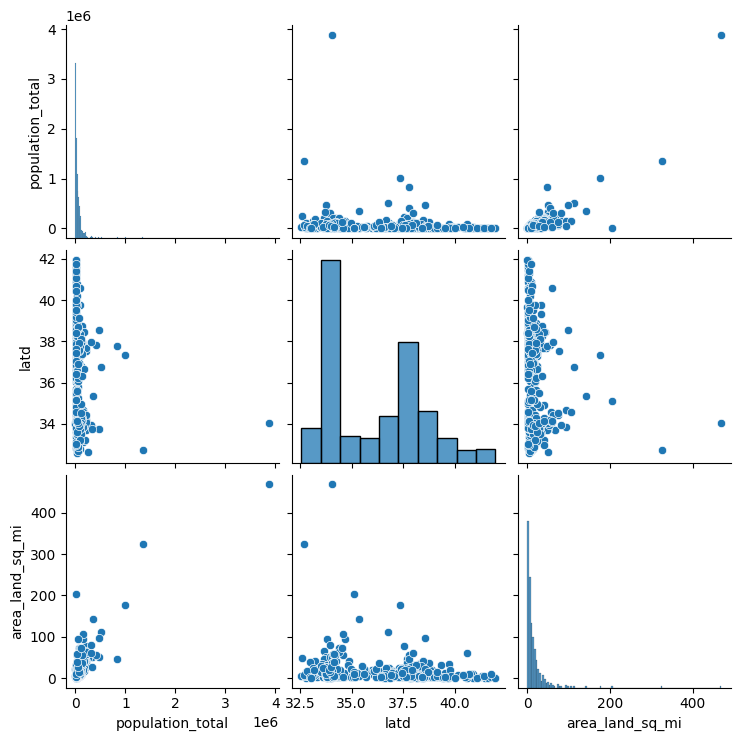

In [41]:
# Suponiendo que 'df' es tu DataFrame y 'target' es la columna de destino
columns_to_plot = plot_features_num_regression(df, target_col="population_total", umbral_corr=0.10, pvalue=None)